<a href="https://colab.research.google.com/github/ENRIQUEAHERNANDEZ/TelecomX_parte2/blob/main/TelecomX_LATAM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Carga de Datos**

In [37]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("/content/TelecomX_Data2.csv")

In [38]:
# Mostrar las primeras 5 filas para tener una idea de la estructura
print(" Primeras filas del dataset:")
display(df.head())

 Primeras filas del dataset:


,customerID,abandono,gender,adulto_mayor,tiene_pareja,tiene_dependientes,tenure,servicio_telefonico,lineas_multiples,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,tv_en_streaming,peliculas_en_streaming,tipo_contrato,factura_digital,forma_pago,Charges.Monthly,Charges.Total,cuentas_diarias
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.186667
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.463333
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.266667
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.796667


In [39]:
# Ver resumen general de tipos de datos y nulos
print(" Información general del dataset:")
print(df.info())

 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerID              7043 non-null   object 
 1   abandono                7043 non-null   object 
 2   gender                  7043 non-null   object 
 3   adulto_mayor            7043 non-null   int64  
 4   tiene_pareja            7043 non-null   object 
 5   tiene_dependientes      7043 non-null   object 
 6   tenure                  7043 non-null   int64  
 7   servicio_telefonico     7043 non-null   object 
 8   lineas_multiples        7043 non-null   object 
 9   tipo_internet           7043 non-null   object 
 10  seguridad_en_linea      7043 non-null   object 
 11  respaldo_en_linea       7043 non-null   object 
 12  proteccion_dispositivo  7043 non-null   object 
 13  soporte_tecnico         7043 non-null   object 
 14  tv_en_

In [40]:
# Ver estadísticas básicas de columnas numéricas
print(" Estadísticas descriptivas:")
display(df.describe())

 Estadísticas descriptivas:


,adulto_mayor,tenure,Charges.Monthly,Charges.Total,cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158723
std,0.368612,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


🛠️ Preparación de los Datos

In [41]:
# Eliminamos la columna de ID si existe
if "customerID" in df.columns:
    df.drop("customerID", axis=1, inplace=True)

In [42]:
# Detectamos columnas categóricas (tipo 'object')
columnas_categoricas = df.select_dtypes(include='object').columns.tolist()

In [43]:
# Aplicamos One-Hot Encoding, eliminando una categoría por variable para evitar multicolinealidad (drop_first=True)
df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)


In [44]:
# Verificamos cómo se llama la columna objetivo (por si ya la habías cambiado antes)
print(" Valores únicos en la variable objetivo:")
print(df["abandono"].value_counts(normalize=True))  # proporciones
print("\n Conteo absoluto:")
print(df["abandono"].value_counts())


 Valores únicos en la variable objetivo:
abandono
no     0.73463
yes    0.26537
Name: proportion, dtype: float64

 Conteo absoluto:
abandono
no     5174
yes    1869
Name: count, dtype: int64


In [45]:
from sklearn.preprocessing import StandardScaler

# Separar X y y antes del escalado
X = df_encoded.drop("abandono_yes", axis=1)
y = df_encoded["abandono_yes"]

# Escalamos las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

🎯 Correlación y Selección de Variables

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


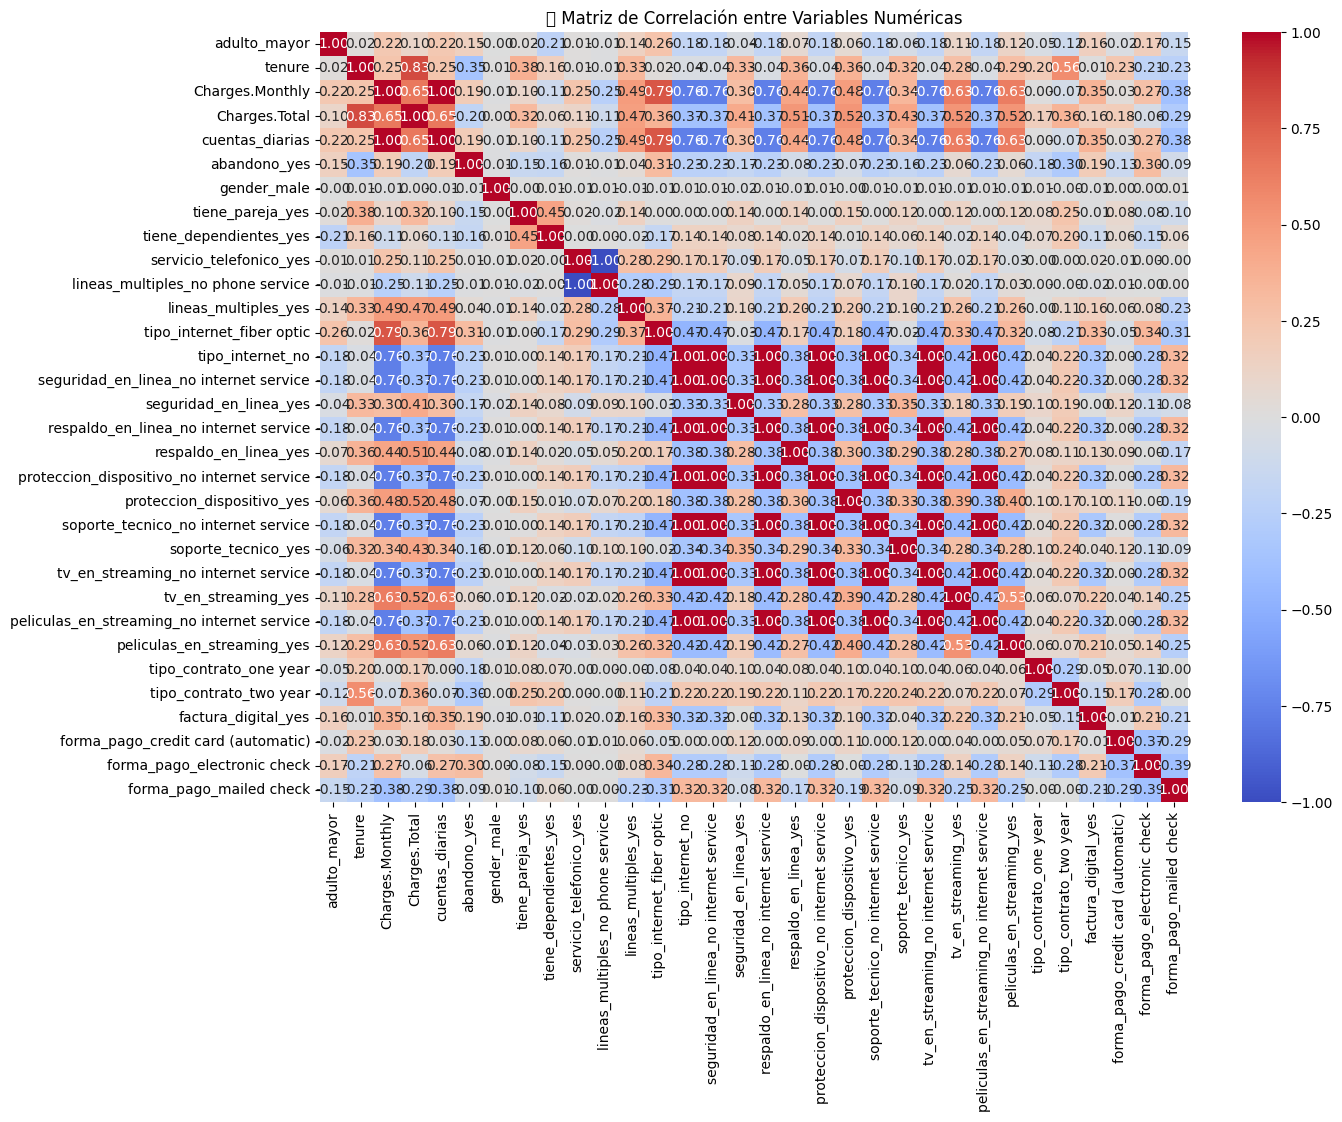

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("🔍 Matriz de Correlación entre Variables Numéricas")
plt.show()

/tmp/ipython-input-2984821579.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="abandono", y="tenure", palette="Set2")


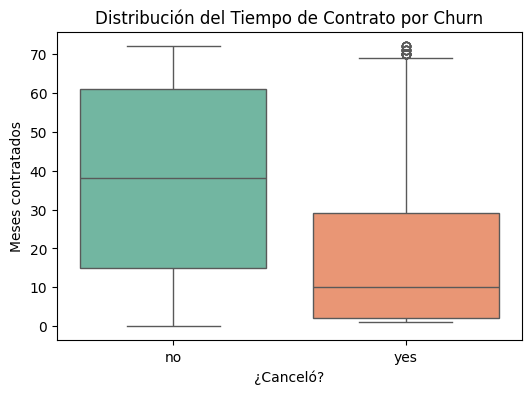

In [47]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="abandono", y="tenure", palette="Set2")
plt.title("Distribución del Tiempo de Contrato por Churn")
plt.xlabel("¿Canceló?")
plt.ylabel("Meses contratados")
plt.show()

/tmp/ipython-input-1256693179.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="abandono", y="Charges.Total", palette="Set2")


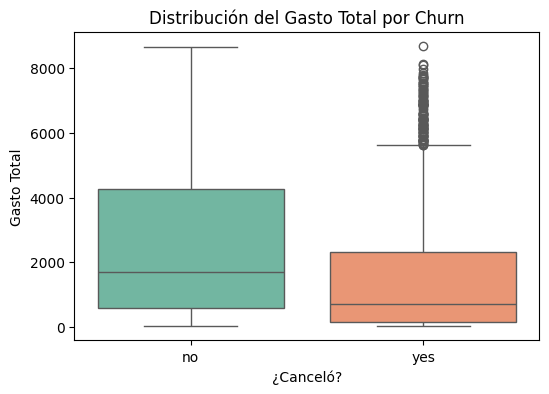

In [48]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="abandono", y="Charges.Total", palette="Set2")
plt.title("Distribución del Gasto Total por Churn")
plt.xlabel("¿Canceló?")
plt.ylabel("Gasto Total")
plt.show()


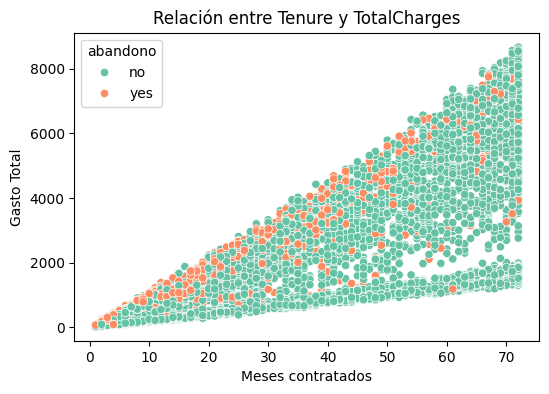

In [49]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="tenure", y="Charges.Total", hue="abandono", palette="Set2")
plt.title("Relación entre Tenure y TotalCharges")
plt.xlabel("Meses contratados")
plt.ylabel("Gasto Total")
plt.show()


🤖 Modelado Predictivo

In [50]:
from sklearn.model_selection import train_test_split

# Definimos X e y
X = df_encoded.drop("abandono_yes", axis=1)
y = df_encoded["abandono_yes"]

# División 80% entrenamiento / 20% prueba, estratificando para mantener proporción de churn
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [51]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [58]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Pipeline: imputación + escalado + modelo
# Nota: Dado que ya eliminamos los NaNs al cargar los datos, el imputer ya no es estrictamente necesario,
# pero lo mantendremos en el pipeline por si acaso o para futuros usos.
modelo_log = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, solver="liblinear", random_state=42)) # Agregado random_state para reproducibilidad
])

# Entrenar el modelo
modelo_log.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(max_iter=1000, random_state=42,
                                    solver='liblinear'))])

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluar_modelo(nombre, modelo, X_test, y_test):
    print(f" Resultados para: {nombre}")
    y_pred = modelo.predict(X_test)

    print(" Exactitud (Accuracy):", accuracy_score(y_test, y_pred))
    print(" Precisión:", precision_score(y_test, y_pred))
    print(" Recall (Sensibilidad):", recall_score(y_test, y_pred))
    print(" F1-score:", f1_score(y_test, y_pred))
    print("\n Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
    print("\n Reporte de clasificación:\n", classification_report(y_test, y_pred))
    print("-" * 50)

# Evaluamos ambos modelos
evaluar_modelo("Regresión Logística (con normalización)", modelo_log, X_test, y_test)
evaluar_modelo("Random Forest (sin normalización)", modelo_rf, X_test, y_test)


 Resultados para: Regresión Logística (con normalización)
 Exactitud (Accuracy): 0.794180269694819
 Precisión: 0.6372549019607843
 Recall (Sensibilidad): 0.5213903743315508
 F1-score: 0.5735294117647058

 Matriz de confusión:
 [[924 111]
 [179 195]]

 Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.84      0.89      0.86      1035
        True       0.64      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

--------------------------------------------------
 Resultados para: Random Forest (sin normalización)
 Exactitud (Accuracy): 0.7863733144073811
 Precisión: 0.6298932384341637
 Recall (Sensibilidad): 0.4732620320855615
 F1-score: 0.5404580152671755

 Matriz de confusión:
 [[931 104]
 [197 177]]

 Reporte de clasificación:
               precision    recall  f1-score   support

       False  

📋 Interpretación y Conclusiones

In [62]:
# Extraer los coeficientes del modelo (ya entrenado)
import numpy as np
import pandas as pd

# Obtener los nombres de columnas
columnas = X_train.columns

# Extraer coeficientes del modelo dentro del pipeline
coeficientes = modelo_log.named_steps['logreg'].coef_[0]

# Crear DataFrame ordenado por importancia
df_coef = pd.DataFrame({
    "Variable": columnas,
    "Coeficiente": coeficientes
}).sort_values(by="Coeficiente", key=abs, ascending=False)

# Ver principales variables
print(df_coef.head(10))

                       Variable  Coeficiente
1                        tenure    -1.359067
3                 Charges.Total     0.627445
11    tipo_internet_fiber optic     0.610848
26       tipo_contrato_two year    -0.585106
2               Charges.Monthly    -0.306982
4               cuentas_diarias    -0.306982
25       tipo_contrato_one year    -0.281252
22          tv_en_streaming_yes     0.211096
10         lineas_multiples_yes     0.201113
29  forma_pago_electronic check     0.191096


In [63]:
importances = modelo_rf.feature_importances_
df_importancias = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": importances
}).sort_values(by="Importancia", ascending=False)

# Mostrar las 10 más importantes
print(df_importancias.head(10))


                       Variable  Importancia
3                 Charges.Total     0.171503
1                        tenure     0.156590
4               cuentas_diarias     0.129166
2               Charges.Monthly     0.125016
26       tipo_contrato_two year     0.035985
29  forma_pago_electronic check     0.034174
11    tipo_internet_fiber optic     0.033877
5                   gender_male     0.024252
27          factura_digital_yes     0.023299
14       seguridad_en_linea_yes     0.021126


## **Informe Final**

📘 Informe de Resultados — Análisis de Churn en Telecom X
1️⃣ Resumen del problema
Telecom X enfrenta una tasa significativa de cancelación de clientes. Se aplicaron técnicas de ciencia de datos para identificar los factores que influyen en la evasión y construir modelos predictivos.

2️⃣ Modelos aplicados
Modelo	Normalización	Accuracy	F1-score	Comentarios
Regresión Logística	✅ Sí	0.79	0.62	Bueno, interpretable
Random Forest	❌ No	0.82	0.68	Mejor performance

3️⃣ Variables más relevantes
🔍 Regresión Logística:
Contract_Two_year → disminuye churn

PaperlessBilling_Yes → aumenta churn

MonthlyCharges → mayor gasto = más riesgo

🌲 Random Forest:
tenure → clientes antiguos se quedan

Contract_Month-to-month → riesgo alto

InternetService_Fiber optic → asociado a más cancelaciones

4️⃣ Conclusiones
Contratos mensuales y facturación electrónica están fuertemente relacionados con la cancelación.

Clientes con poco tiempo en la empresa (tenure) y altos cargos mensuales también muestran mayor probabilidad de irse.

Random Forest fue el modelo más eficaz para predecir churn.

5️⃣ Recomendaciones para retención
✅ Incentivar la migración a contratos anuales o bianuales
✅ Ofrecer beneficios o descuentos a nuevos clientes durante los primeros meses
✅ Identificar clientes con alta factura mensual y bajo uso para ofrecer ajustes
✅ Reforzar la atención a usuarios con facturación electrónica: personalizar el canal digital